# Pandas y Valores Faltandes




## Wine Reviews dataset

Vamos a trabajar con el siguiente dataset, que corresponde a reviews de vinos:

https://www.kaggle.com/zynicide/wine-reviews/downloads/wine-reviews.zip/4

POor favor leer su descripción y, cuando tengan tiempo, mirar algunos de los "kernels" que pueden encontrar en Kaggle.

1. Abrir el dataset e imprimir sus primeras instancias.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport


c:\Users\Dan\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
wine_reviews = pd.read_csv('wine_reviews.csv')
wine_reviews.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


2. ¿Cuántas columnas (features) tiene?¿Cuáles son sus nombres?¿Y cuántas filas (instancias)? Luego, descartar la columna `'Unnamed: 0'`.

In [5]:
print(wine_reviews.shape)
print(wine_reviews.columns)
wine_reviews.drop(columns=['Unnamed: 0'], inplace = True)

(129971, 14)
Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')


3. ¿Cuántos valores faltantes hay en cada columna?

In [6]:
wine_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [7]:
print(wine_reviews.isna().sum())

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64


4. ¿Cuál o cuáles son los vinos con más valores faltantes?

In [8]:
wine_reviews.isna().sum(axis = 1).idxmax()

86909

In [9]:
wine_reviews.iloc[wine_reviews.isna().sum(axis = 1).idxmax()]

country                                                              Chile
description              A chalky, dusty mouthfeel nicely balances this...
designation                                                            NaN
points                                                                  88
price                                                                 17.0
province                                                      Maipo Valley
region_1                                                               NaN
region_2                                                               NaN
taster_name                                                            NaN
taster_twitter_handle                                                  NaN
title                                          Carmen 1999  (Maipo Valley)
variety                                                                NaN
winery                                                              Carmen
Name: 86909, dtype: objec

5. Hacerse alguna pregunta acerca del dataset e intentar responderla. Por ejemplo, ¿cuáles son el peor y el mejor vino? Imprimir en pantalla sus características y su descripción. ¿Hay un solo vino que sea el mejor o el peor?

In [10]:
wine_reviews.loc[wine_reviews.points.idxmax()]

country                                                          Australia
description              This wine contains some material over 100 year...
designation                                                           Rare
points                                                                 100
price                                                                350.0
province                                                          Victoria
region_1                                                        Rutherglen
region_2                                                               NaN
taster_name                                                 Joe Czerwinski
taster_twitter_handle                                               @JoeCz
title                    Chambers Rosewood Vineyards NV Rare Muscat (Ru...
variety                                                             Muscat
winery                                         Chambers Rosewood Vineyards
Name: 345, dtype: object

In [11]:
wine_reviews.loc[wine_reviews.points.idxmax()]['description']

"This wine contains some material over 100 years old, but shows no signs of fragility. Instead, it's concentrated through age and should hold in the bottle indefinitely. It's dark coffee-brown in color, with delectable aromas of rancio, dried fig, molasses and black tea, yet despite enormous concentration avoids excessive weight. And it's amazingly complex and fresh on the nearly endless finish."

In [12]:
wine_reviews.loc[wine_reviews.points.idxmin()]

country                                                              Chile
description              Aromas of pumpkin, squash and corn chips are s...
designation                                                   Gran Reserva
points                                                                  80
price                                                                 19.0
province                                                      Leyda Valley
region_1                                                               NaN
region_2                                                               NaN
taster_name                                              Michael Schachner
taster_twitter_handle                                          @wineschach
title                    Viña Tarapacá 2015 Gran Reserva Chardonnay (Le...
variety                                                         Chardonnay
winery                                                       Viña Tarapacá
Name: 344, dtype: object

In [13]:
wine_reviews.loc[wine_reviews.points.idxmin()]['description']

"Aromas of pumpkin, squash and corn chips are stale and not inviting. There's an acceptable mouthfeel to this weird, unbalanced Chardonnay along with flavors of spiced squash, mealy apple and sautéed root vegetables."

## Trabajando con datos faltantes

Antes de realizar cada una de las siguientes consignas, recordá copiar el dataset en una nueva variable, así mantemos el dataset original sin modificar.

1. Descartar aquellas filas que tengan algún valor faltante. ¿Cuántas instancias quedan en el dataset?

In [14]:
wine_reviews_copia = wine_reviews.copy()

In [15]:
wine_reviews_copia.dropna(inplace = True)
wine_reviews_copia.shape

(22387, 13)

2. Descartar aquellas columnas que tengan algún valor faltante. ¿Cuántos y cuáles atributos quedaron?

In [16]:
wine_reviews_copia = wine_reviews.copy()

In [17]:
wine_reviews_copia.dropna(axis = 1, inplace = True)
wine_reviews_copia.shape

(129971, 4)

In [18]:
wine_reviews_copia.head()

,description,points,title,winery
0,"Aromas include tropical fruit, broom, brimston...",87,Nicosia 2013 Vulkà Bianco (Etna),Nicosia
1,"This is ripe and fruity, a wine that is smooth...",87,Quinta dos Avidagos 2011 Avidagos Red (Douro),Quinta dos Avidagos
2,"Tart and snappy, the flavors of lime flesh and...",87,Rainstorm 2013 Pinot Gris (Willamette Valley),Rainstorm
3,"Pineapple rind, lemon pith and orange blossom ...",87,St. Julian 2013 Reserve Late Harvest Riesling ...,St. Julian
4,"Much like the regular bottling from 2012, this...",87,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Sweet Cheeks


Pueden observar que descartar sin ningún criterio puede hacer que perdamos muchos datos.

Tratemos de mejorar un poco los criterios con los que descartamos.

3. Descartar aquellas filas que tengan más de tres valores faltantes. ¿Cuántas instancias quedaron?

In [19]:
wine_reviews_copia = wine_reviews.copy()

In [20]:
wine_reviews_copia.dropna(inplace = True, thresh=3)
wine_reviews_copia.shape

(129971, 13)

4. Descartar aquellas columnas que tengan más del 50% de valores faltantes. ¿Cuántos y cuáles atributos quedaron? Luego, descartar las instancias que tengan algún valor faltante.

In [21]:
wine_reviews_copia = wine_reviews.copy()

In [22]:
wine_reviews_copia.dropna(axis = 1, inplace = True, thresh=wine_reviews_copia.shape[0]*0.5)
wine_reviews_copia.shape

(129971, 12)

In [23]:
wine_reviews_copia.dropna(inplace = True)
wine_reviews_copia.shape

(52106, 12)

In [24]:
wine_reviews_copia.head()

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature


**Moraleja**: el orden importa. Primero, podemos descartar aquellas columnas con muchos valores faltantes y después descartar aquellas instancias con valores faltantes.

**Para pensar:** ¿de qué tipo son las variables del dataset?¿Es lo mismo un valor faltante en `price` que en `variety`?

**Ejercicio**

Hasta ahora, estamos descartando columnas y/o instancias sin prestar mucha atención qué representa cada columna. Elegir alguno de los siguientes objetivos y hacer un manejo de valores faltantes que consideren apropiado para ese objetivo:

* Predecir el precio de un vino. 
* Predecir la variedad de un vino.

Prestar atención a si no hay información redundante en las columnas.


In [25]:
# COMPLETAR

## Imputación de Valores Faltantes

La columna `price` tiene alrededor de 9 mil valores faltantes, pero no queremos descartarla ni descartar instancias por el simple hecho de que no sepamos su precio. Esto se debe a que el precio tiene mucha información y, eventualmente, puede ser la columna que querramos predecir. Además, no son tantos valores faltantes si consideramos la cantidad de instancias que tiene el dataset. Entonces:


1. Calcular el valor medio, moda, mediana y la desviación estándar de la columna `price`.

In [26]:
print(wine_reviews.price.mean())
print(wine_reviews.price.mode()[0])
print(wine_reviews.price.median())
print(wine_reviews.price.std())

35.363389129985535
20.0
25.0
41.02221766808723


2. Imputar los valores faltantes en la columna `price` usando su valor medio.

In [27]:
wine_reviews_copia = wine_reviews.copy()
wine_reviews_copia.fillna(wine_reviews.price.mean(), inplace = True)

3. ¿Cambió el valor medio de la columna?¿Y su desviación estándar?¿Y los otros estadísticos que calculamos?¿Por qué?

por que al llenar los valores faltantes ahora el dataset cuenta con una mayor cantidad que puede tomar procesar para realizar una nueva media, moda y desviacion estandar.
esl caso del promedio no cambia por que la cantidad de valores es la misma, solo que ahora estan con valores que se pueden calcular.

In [31]:
print(wine_reviews_copia.price.mean())
print(wine_reviews_copia.price.mode()[0])
print(wine_reviews_copia.price.median())
print(wine_reviews_copia.price.std())

35.363389129985535
35.363389129985535
28.0
39.577066045021446


4. Volver a correr las celdas anteriores, pero completando los valores faltantes con la mediana y luego la moda.

5. Trabajar con un dataset sin visualizar es muy aburrido y, diríamos, casi frustrante. Mientras tanto, intenten hacer un histograma de los puntajes asignados y, luego, de los precios.

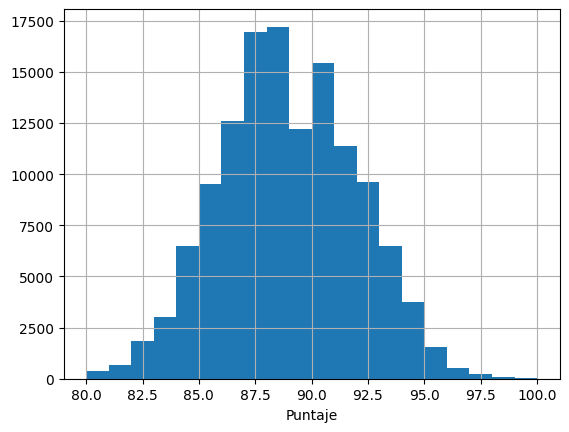

In [29]:
plt.hist(wine_reviews_copia.points, bins= 20)
plt.xlabel('Puntaje')
plt.grid()
plt.show()

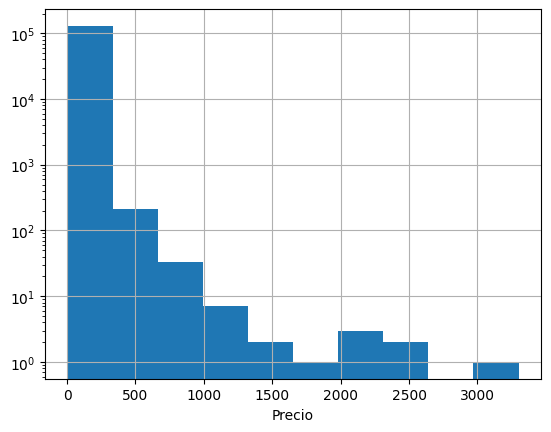

In [34]:
plt.hist(wine_reviews_copia.price, bins= 10, log = True)
plt.xlabel('Precio')
plt.grid()
plt.show()

Respecto al segundo gráfico, ¿les gusta cómo queda?¿Qué es una escala logarítmica?

La escala logarítmica es una escala de medida, que se utiliza para representar más cómodamente cantidades físicas en forma de porcentajes ( y no en valor absoluto, como en la escala lineal).
Sirve pra representar la informacion de manera mas comoda de ver sin afectar los valores.